In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import pandas as pd

from agent import DDPG
from task import Task

In [4]:
task = Task()
agent = DDPG(task)

resultsAll = []
high_score = 10000
low_score = -10000

training_results = {
    'score': []
}
num_episodes = 100

[ 5.65093047 12.89183004]


[ 0.55768258 10.38312914]
0.4774934
0.46900392
0.4574658
0.4647797
Episode =    1, score = -1000.000, low score = -10000.000, high score = 10000.000, x_pos =   0.112, y_pos =   1.355


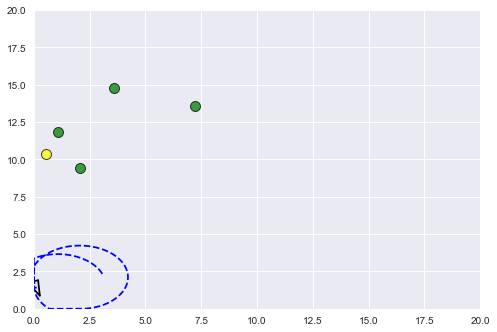

[19.94762478 12.06548458]
0.42894736
0.44250828
0.43151107
0.47428283
Episode =    2, score = -1000.000, low score = -10000.000, high score = 10000.000, x_pos =   6.651, y_pos =   3.293


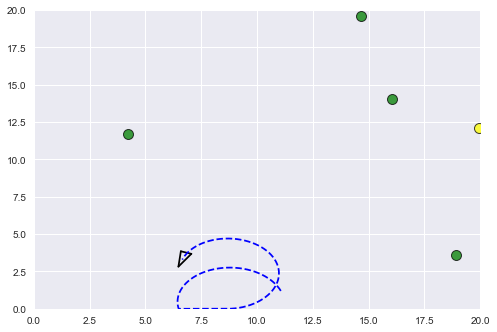

[7.11106164 4.68080766]
0.34219924
0.3143971
0.3406678
0.36582848
Episode =    3, score = -1000.000, low score = -10000.000, high score = 10000.000, x_pos =  14.116, y_pos =   7.536


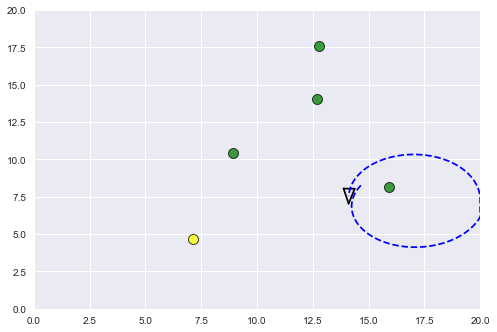

[10.41786527 16.74541892]
0.39068192
0.41903275
0.45868403
0.41549978
Episode =    4, score = -1000.000, low score = -10000.000, high score = 10000.000, x_pos =   2.735, y_pos =   8.533


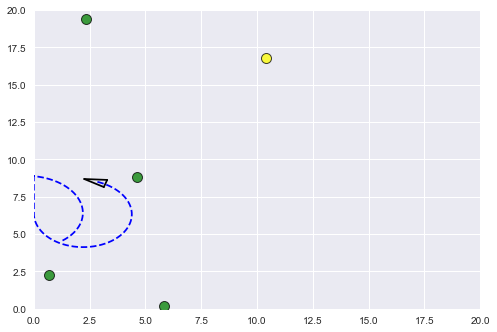

[10.48000626  9.70273457]
0.37342027
0.33567983
Episode =    5, score = -648.500, low score = -10000.000, high score = 10000.000, x_pos =  17.778, y_pos =   2.560


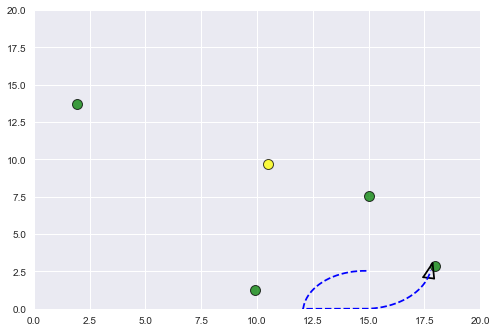

[18.59824185 19.49446857]
0.3491142


D:\Coding\code\Multi-agent-RL\agent.py:154: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  local_weights = np.array(local_model.get_weights())
D:\Coding\code\Multi-agent-RL\agent.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  target_weights = np.array(target_model.get_weights())


1.0
0.0
0.0
Episode =    6, score = -1000.000, low score = -10000.000, high score = 10000.000, x_pos =  20.000, y_pos =  13.540


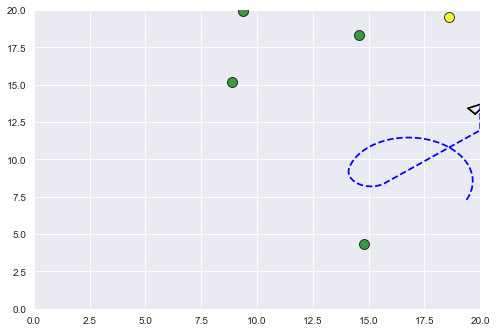

[15.64959071  5.46522632]


D:\Coding\code\Multi-agent-RL\agent.py:154: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  local_weights = np.array(local_model.get_weights())
D:\Coding\code\Multi-agent-RL\agent.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  target_weights = np.array(target_model.get_weights())


0.0
0.0
0.0
0.0
Episode =    7, score = -1000.000, low score = -10000.000, high score = 10000.000, x_pos =  20.000, y_pos =  20.000


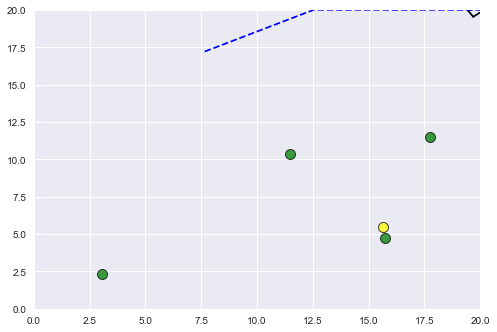

[ 6.5231387 11.2357516]


D:\Coding\code\Multi-agent-RL\agent.py:154: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  local_weights = np.array(local_model.get_weights())
D:\Coding\code\Multi-agent-RL\agent.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  target_weights = np.array(target_model.get_weights())


0.0
0.0


In [ ]:
for i in range(1, num_episodes+1):
    state = agent.reset_episode()
    score = 0
    episode_results = {'time': [], 'x': [], 'y': [], 'theta': [], 'reward': []}
    t_step = 0
    while True:
        t_step+=1
        action = agent.act(state)
        if(t_step%500==0):
            print(action[0])
        next_state, reward, done = task.step(state, action)
        agent.step(state, action, reward, next_state, done)
        state = next_state
        score += reward
        high_score = max(high_score, score)
        low_score = min(low_score, score)

    # track the results for offline analysis
    
        episode_results['time'].append(task.sim.time)
        episode_results['x'].append(state[0])
        episode_results['y'].append(state[1])
        episode_results['theta'].append(state[2])
        episode_results['reward'].append(reward)

        if done:
            print("\rEpisode = {:4d}, score = {:7.3f}, low score = {:7.3f}, high score = {:7.3f}, x_pos = {:7.3f}, y_pos = {:7.3f}".format(i, score, low_score, high_score, state[0], state[1]), end="\n")
            task.sim.plot_trajectory(state[0], state[1], state[2], episode_results['x'], episode_results['y'])
            training_results['score'].append(score)
            break

        resultsAll.append(episode_results)

        sys.stdout.flush()       